# Sentiment Analysis using BERT

BERT (Bidirectionnal Encoder Representations for Transformers) is a ‚Äúnew method of pre-training language representations‚Äù developed by Google and released in late 2018.

### Import Libraries and Set the intial variables

In [1]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.9/40.9 kB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.3/9.3 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 776.2/776.2 kB 6.6 MB/s eta 0:00:007.0 MB/s eta 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 6.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice]

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Load the data

In [7]:
df = pd.read_csv('~/Downloads/twitter_English.csv')
df.shape

(1000, 2)

In [8]:
# Let's have a look at the data 
df.head()

tweet  label
0  I just don‚Äôt take my baby out because it gives...      1
1  Suicide figures are up 200% since lockdown. \n...      1
2  she has really been feeding us this week https...      0
3  I can confirm that yes, I do need to stay on m...      1
4  Today is pie day! Celebrate with your "I Ate P...      0

We can see that the most relevant column for us is content and replyContent and the score as well.

In [9]:
# Let's check for missing values 
df.isnull().sum()

tweet    0
label    0
dtype: int64

There are missing values in some of the columns but Content and score don't have a missing value. We can also look at the class balance. 

We will be alloting three classes:- 
1. Positive (Score: 4-5)
2. Neutral (Score: 3)
3. Negative (Score: 1-2)

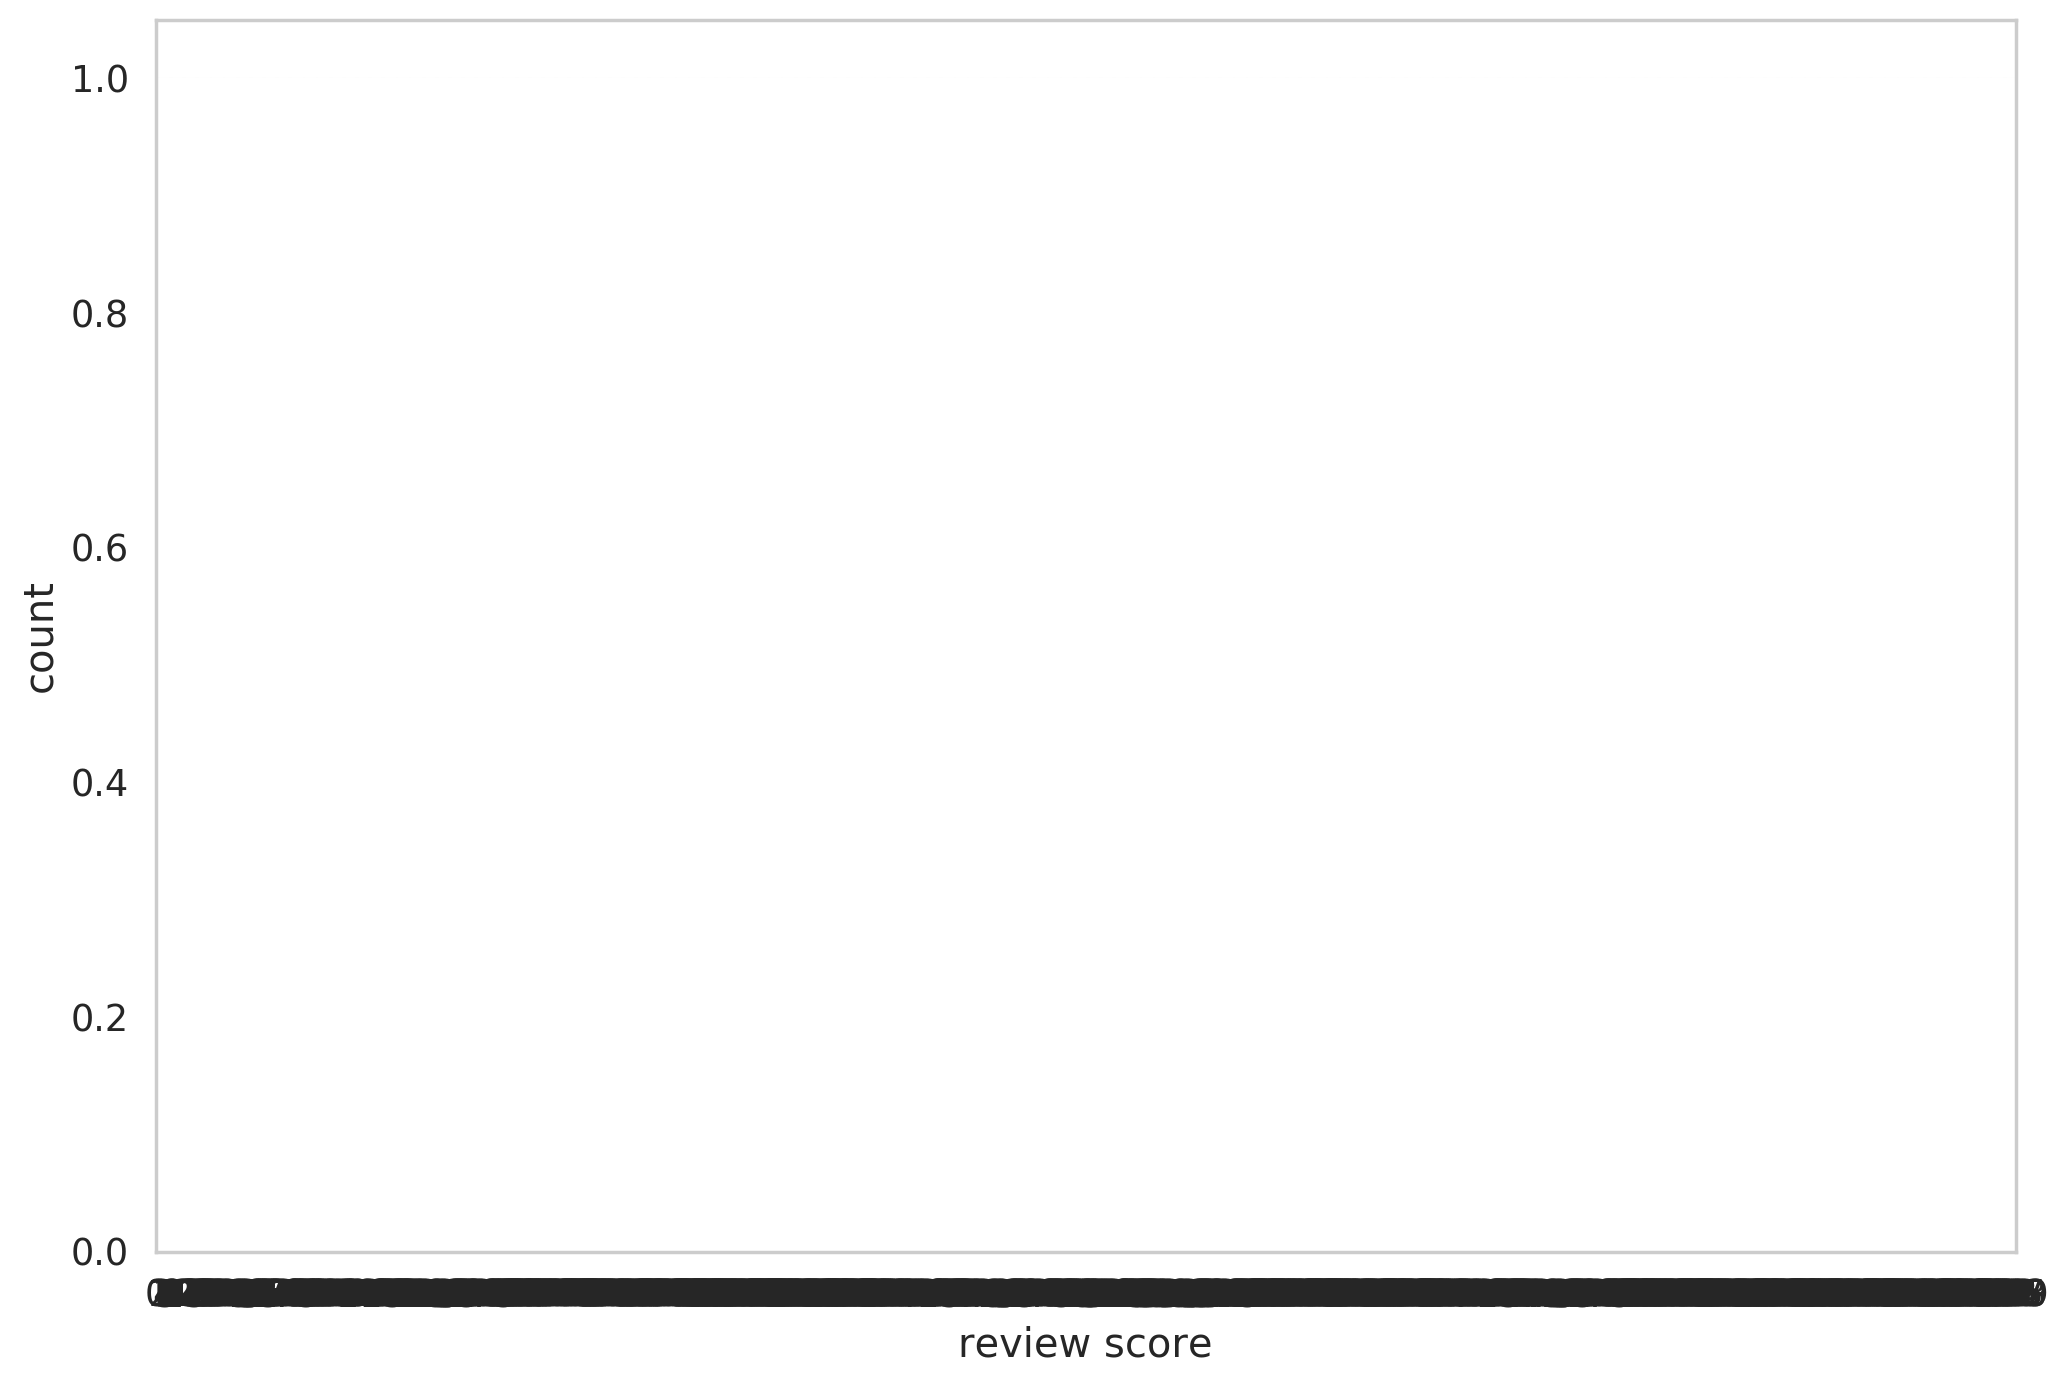

In [10]:
# Let's have a look at the class balance.
sns.countplot(df.label)
plt.xlabel('review score');

We can see that we have more positive classes than negative and low number of neutral class. I have kept neutral less to focus more on positive and negative classes. Let's allot classes based on scores now. 

* 0 - negative
* 1 - neutral 
* 2 - positive

[Text(0, 0, 'not depressed'), Text(0, 0, 'depressed')]

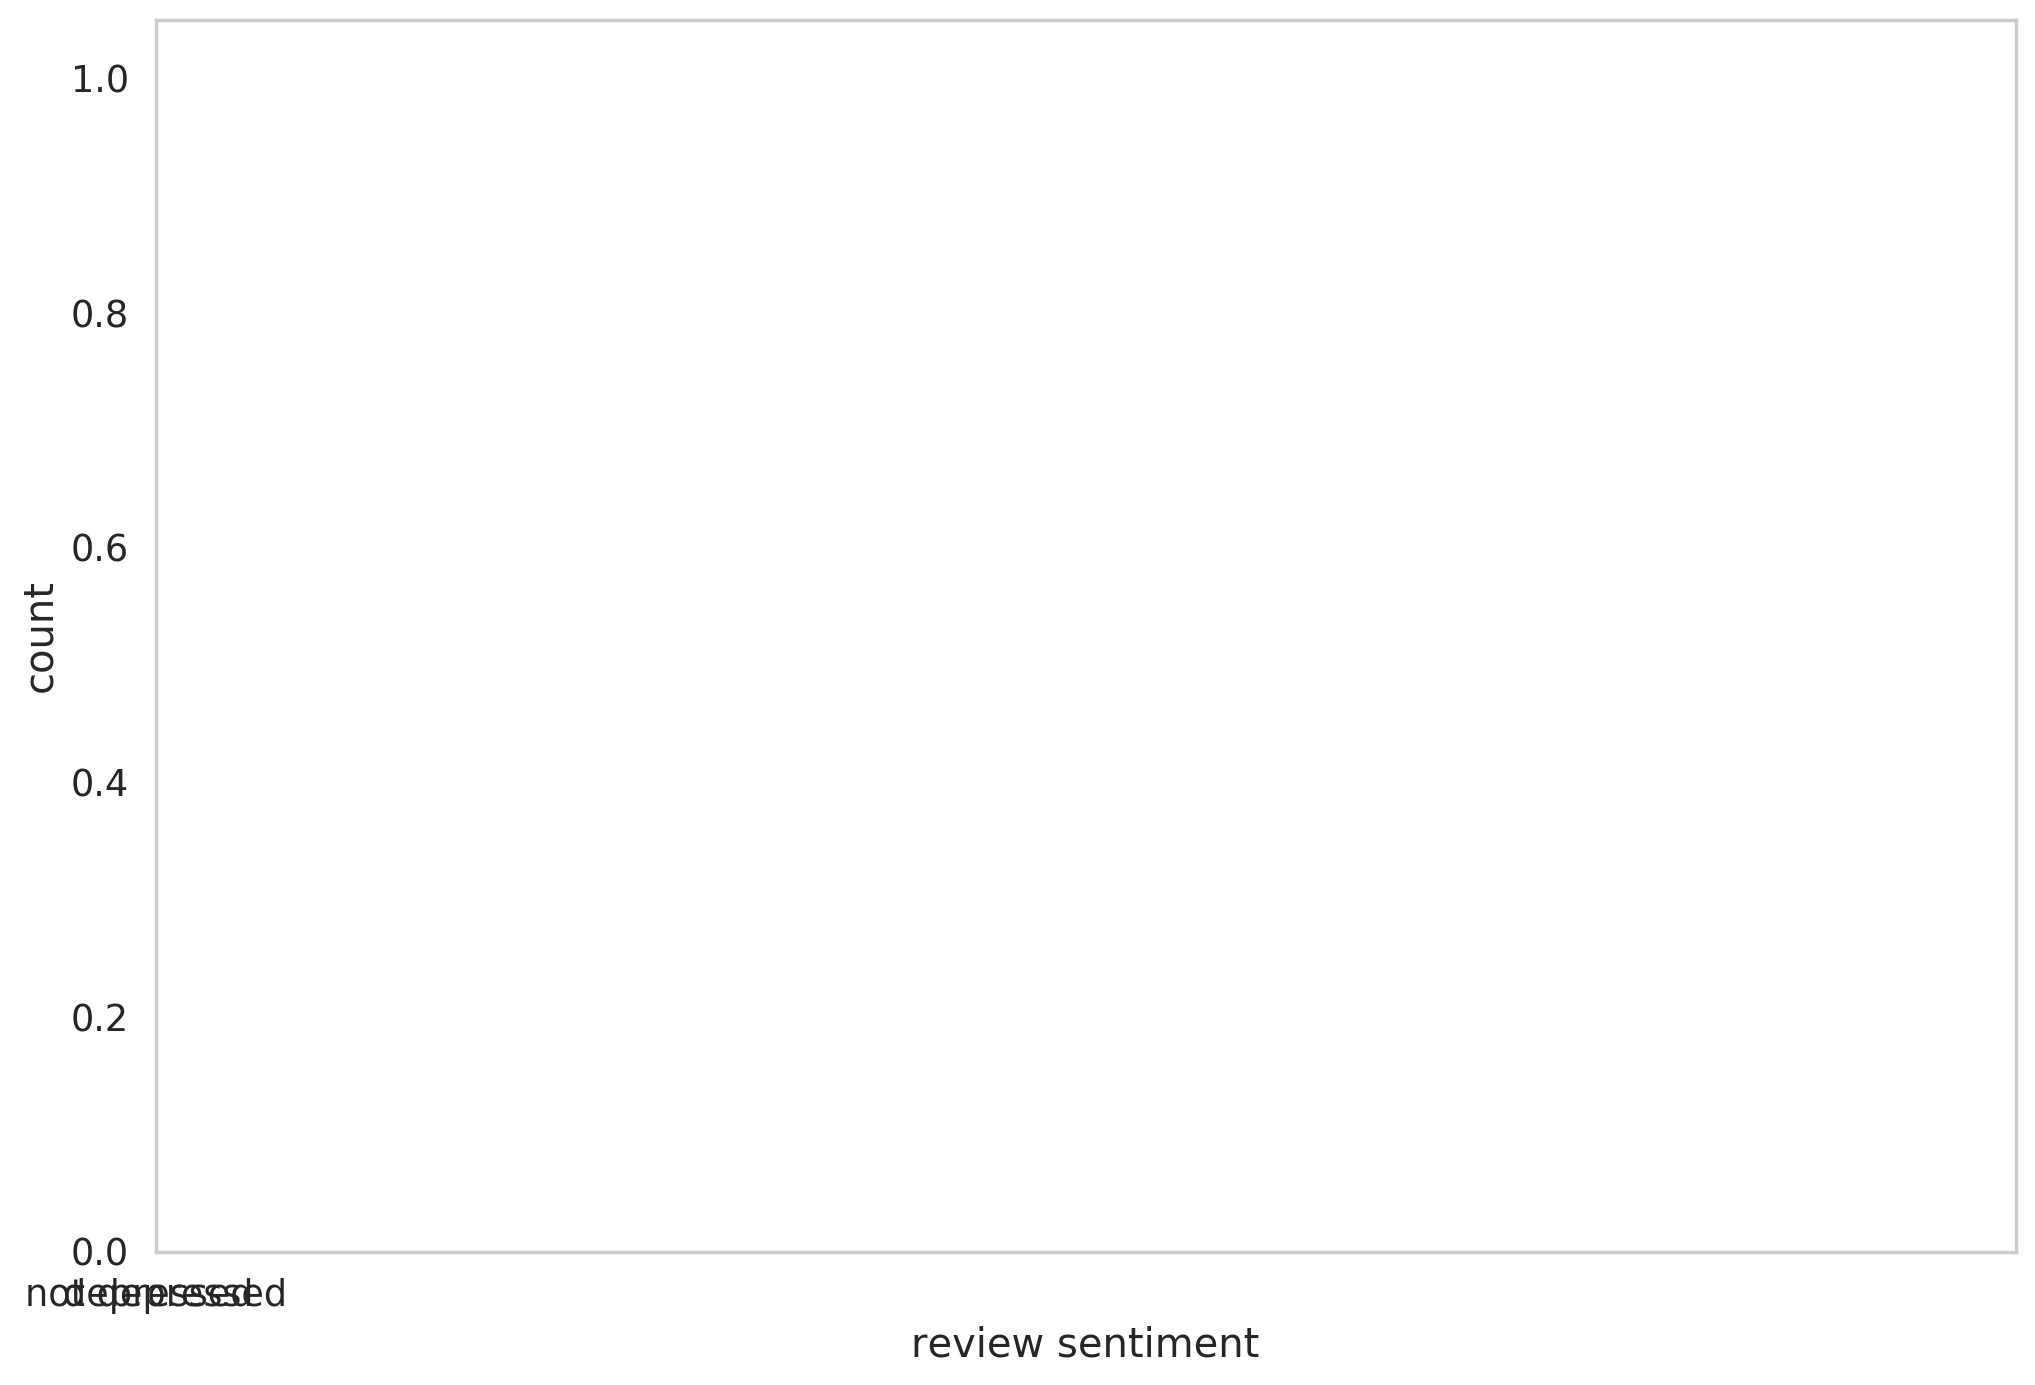

In [11]:
# Plot the distribution
class_names = ['not depressed', 'depressed']
ax = sns.countplot(df.label)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

## Data Preprocessing

Machine Learning models don‚Äôt work with raw text. You need to convert text to numerical representation. BERT requires even more attention when it comes to this representation. 

Here are the requirements:

* Add special tokens to separate sentences and do classification
* Pass sequences of constant length (introduce padding)
* Create array of 0s (pad token) and 1s (real token) called attention mask

BERT offers a few model architectures and I will be using one of them combined with manual preprocessing. I am using the cased version which considers GREAT and great to be to different entities and BAD might be given more focus than bad.  

The tokenizer will break the sentence into words and give numerical values to each word. 

In [13]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME, force_download=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we‚Äôre doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


BERT works with fixed-length sequences. We‚Äôll use a simple strategy to choose the max length. Let‚Äôs store the token length of each review.

In [17]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df.tweet:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

token_lens

[31,
 66,
 27,
 44,
 59,
 64,
 100,
 34,
 69,
 89,
 34,
 71,
 77,
 48,
 73,
 53,
 60,
 10,
 17,
 20,
 75,
 52,
 5,
 43,
 56,
 54,
 87,
 91,
 31,
 41,
 76,
 36,
 31,
 62,
 23,
 65,
 40,
 67,
 15,
 12,
 30,
 23,
 15,
 68,
 62,
 50,
 23,
 27,
 16,
 13,
 35,
 23,
 37,
 48,
 45,
 30,
 37,
 60,
 27,
 73,
 26,
 40,
 7,
 24,
 60,
 52,
 21,
 92,
 36,
 30,
 87,
 76,
 80,
 24,
 92,
 50,
 73,
 48,
 41,
 29,
 40,
 87,
 32,
 32,
 34,
 32,
 42,
 30,
 36,
 61,
 39,
 18,
 25,
 71,
 8,
 27,
 60,
 37,
 63,
 41,
 55,
 14,
 41,
 28,
 31,
 100,
 39,
 49,
 23,
 28,
 32,
 86,
 60,
 21,
 21,
 53,
 34,
 48,
 17,
 29,
 24,
 91,
 65,
 22,
 39,
 43,
 39,
 60,
 21,
 13,
 25,
 44,
 35,
 47,
 35,
 51,
 35,
 60,
 22,
 29,
 24,
 61,
 48,
 34,
 9,
 80,
 41,
 25,
 40,
 34,
 31,
 33,
 7,
 71,
 30,
 55,
 69,
 83,
 40,
 98,
 62,
 38,
 79,
 31,
 5,
 150,
 29,
 12,
 52,
 34,
 44,
 63,
 27,
 45,
 29,
 98,
 71,
 67,
 71,
 35,
 42,
 23,
 14,
 61,
 12,
 25,
 39,
 57,
 79,
 53,
 48,
 31,
 38,
 34,
 10,
 85,
 8,
 98,
 22,
 45,
 82,

AttributeError: type object 'Line2D' has no attribute 'items'

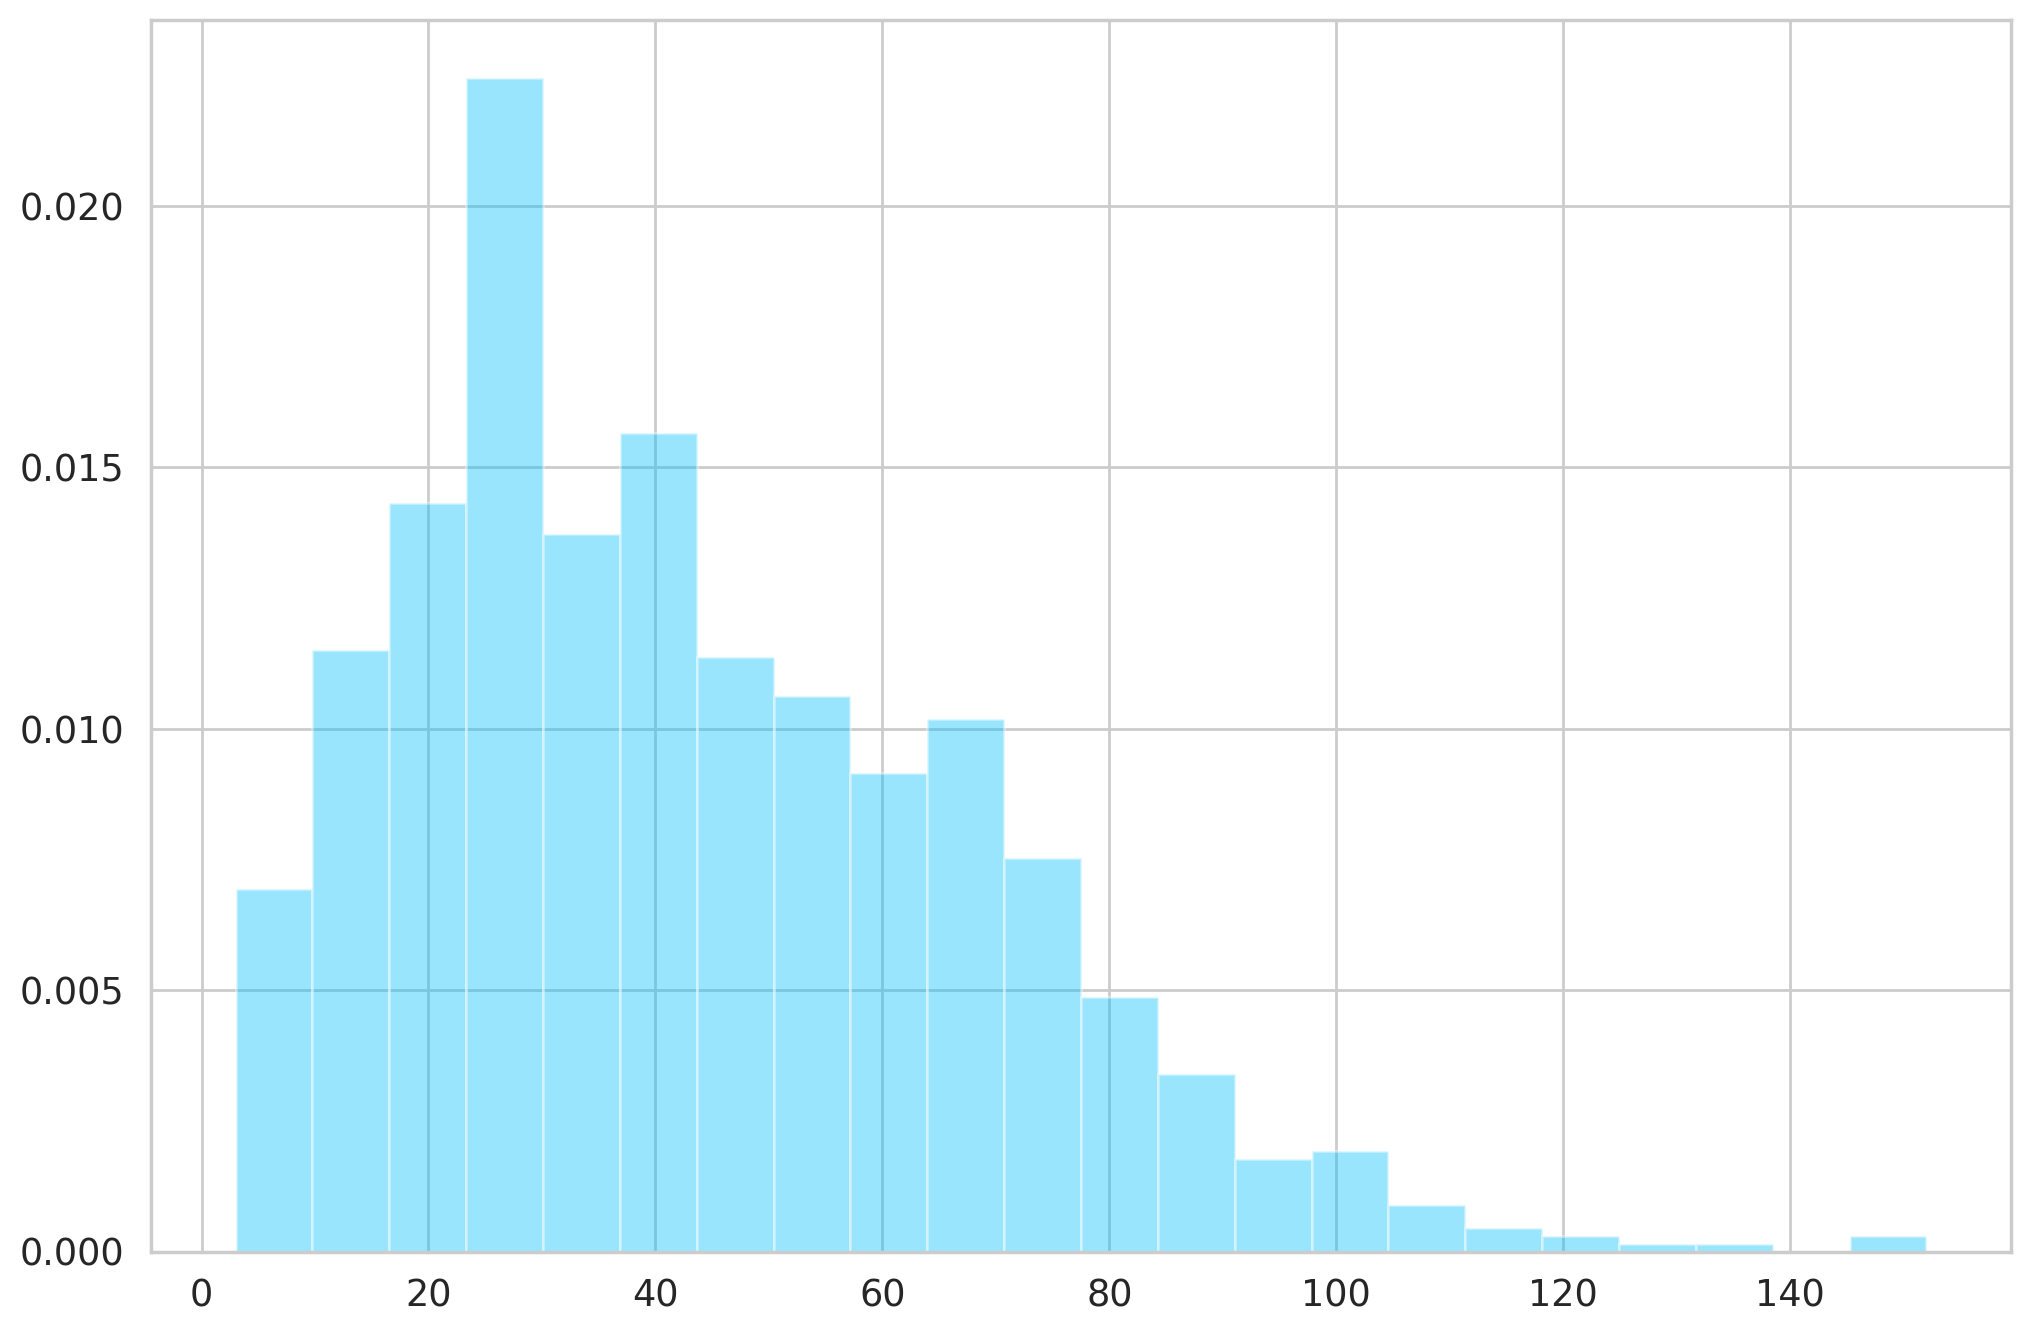

In [16]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

Most of the reviews seem to contain less than 120 tokens, but we‚Äôll be on the safe side and choose a maximum length of 160. 

In [18]:
MAX_LEN = 160

### Preparing Torch Dataset

To enter data into a PyTorch, we need a more robust data generator class. We will return the review text as well to validate our predictions easily. 

In [38]:
class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

Create a 80% train data and 10% test and 10% validation data

In [39]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(800, 2) (100, 2) (100, 2)


Create a dataloader to release data in batches.

In [40]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.tweet.to_numpy(),
        targets=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [41]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [42]:
# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [46]:
data

{'review_text': ['This is my confession #Anxious @sarahreeves \nWow! She just pulled the words out of my mouth. I do battle anxiety...\nHers songs cut down to the bone',
  '2 hours and 39 minutes left before Hu Tao Banner',
  'Feeling hungry and you‚Äôre in a hurry?\nTry our ùê∏ùìçùìÖùìáùëíùìàùìà ùêøùìäùìÉùí∏ùíΩ.\nHave a look at the menu now: https://t.co/pOZsKHePnf\n#rusticstone #restaurantdublin #eatwell #foodlover #food #foodpics #chefsofinstagram #culinary #restaurant #eat #chefmode https://t.co/sJCfzmCoch',
  "D - 29 @BTS_twt \n\nJimin's sweet and angelic voice makes me so calm, yet so emotional... When he's singing, he delivers his feelings perfectly! https://t.co/svl6FVwHug",
  'I realize my office has become quite the hoarder‚Äôs cave of wonders. \n\nBut really, the only difference between hoarding and preparedness is good organization and storage solutions. \n\nTherefore... I need to buy more storage stuff. ü§£ü§£ü§£ü§£',
  'If reports that Lorient are signing 

## Sentiment Classification with BERT and Hugging Face

We‚Äôll use the basic BertModel and build our sentiment classifier on top of it. Let‚Äôs load the model

In [26]:
# Load the basic BERT model 
bert_model = BertModel.from_pretrained(MODEL_NAME)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [59]:
# Build the Sentiment Classifier class 
class SentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask,
          return_dict=False
        )
        #  Add a dropout layer 
        output = self.drop(pooled_output)
        return self.out(output)

We use a dropout layer for some regularization and a fully-connected layer for our output. We are returning the raw output of the last layer since that is required for the cross-entropy loss function in PyTorch to work. Create an instance and move it to the GPU

In [60]:
# Instantiate the model and move to classifier
model = SentimentClassifier(len(class_names))
model = model.to(device)

#### Model Characterstics

In [61]:
# Number of hidden units
print(bert_model.config.hidden_size)

768


### Training Phase

we‚Äôll use the AdamW optimizer provided by Hugging Face. It corrects weight decay. We‚Äôll also use a linear scheduler with no warmup

In [62]:
# Number of iterations 
EPOCHS = 10

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [76]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

Write a function to evaluate model performance

In [77]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

Write the training Loop and store the best training state.

In [78]:
model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, eleme

In [79]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.7388012039661408 accuracy 0.49
Val   loss 0.6837481771196637 accuracy 0.44

Epoch 2/10
----------
Train loss 0.4178780525922775 accuracy 0.8475
Val   loss 0.3529656444277082 accuracy 0.91

Epoch 3/10
----------
Train loss 0.22815169874578714 accuracy 0.93375
Val   loss 0.1702948162066085 accuracy 0.9500000000000001

Epoch 4/10
----------
Train loss 0.11812689274083824 accuracy 0.9712500000000001
Val   loss 0.29748654179275036 accuracy 0.92

Epoch 5/10
----------
Train loss 0.07973141922149807 accuracy 0.98375
Val   loss 0.2636092460847327 accuracy 0.9400000000000001

Epoch 6/10
----------
Train loss 0.061536151831969615 accuracy 0.9862500000000001
Val   loss 0.36520177757899674 accuracy 0.92

Epoch 7/10
----------
Train loss 0.028202560698846354 accuracy 0.99375
Val   loss 0.3740776130497189 accuracy 0.92

Epoch 8/10
----------
Train loss 0.011944892195169815 accuracy 0.9975
Val   loss 0.36039353258508655 accuracy 0.93

Epoch 9/10
----------
Train los

The above took a lot of time but it's finally working. Now, we can plot the training and validation accuracy.

In [81]:
history

defaultdict(list,
            {'train_acc': [tensor(0.4900, device='cuda:0', dtype=torch.float64),
              tensor(0.8475, device='cuda:0', dtype=torch.float64),
              tensor(0.9337, device='cuda:0', dtype=torch.float64),
              tensor(0.9713, device='cuda:0', dtype=torch.float64),
              tensor(0.9838, device='cuda:0', dtype=torch.float64),
              tensor(0.9863, device='cuda:0', dtype=torch.float64),
              tensor(0.9938, device='cuda:0', dtype=torch.float64),
              tensor(0.9975, device='cuda:0', dtype=torch.float64),
              tensor(0.9975, device='cuda:0', dtype=torch.float64),
              tensor(0.9988, device='cuda:0', dtype=torch.float64)],
             'train_loss': [0.7388012039661408,
              0.4178780525922775,
              0.22815169874578714,
              0.11812689274083824,
              0.07973141922149807,
              0.061536151831969615,
              0.028202560698846354,
              0.0119448921951

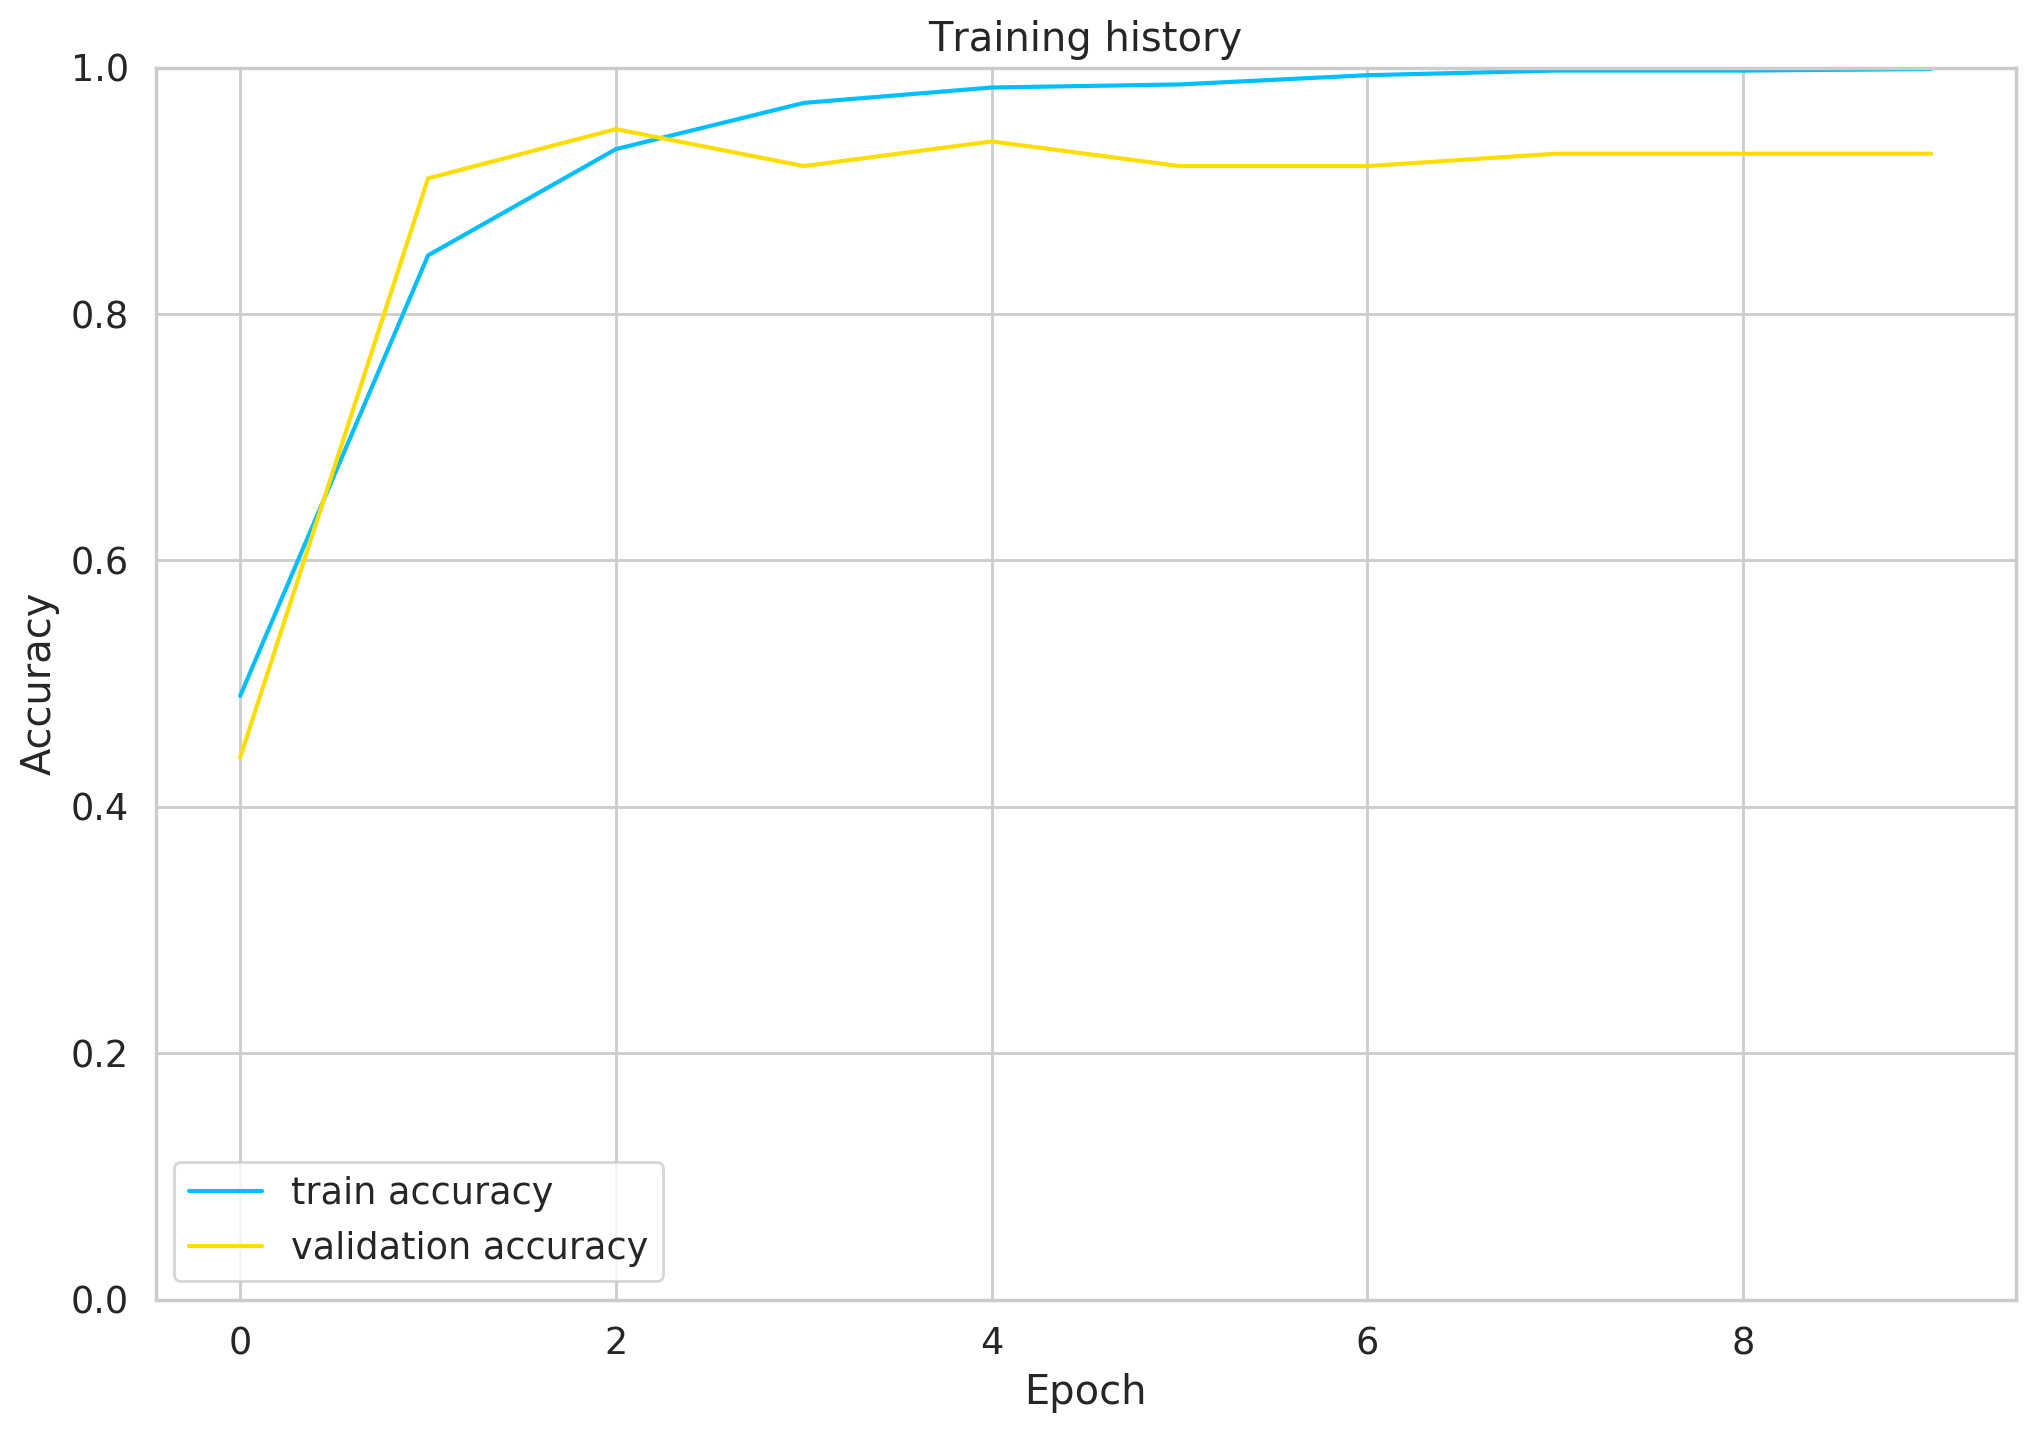

In [83]:
# Plot training and validation accuracy
plt.plot(list(map(lambda x: x.cpu(), history['train_acc'])), label='train accuracy')
plt.plot(list(map(lambda x: x.cpu(), history['val_acc'])), label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

### Model Evaluation

In [84]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.97

Define a helper function to get predictions from our models. This is similar to the evaluation function, except that we‚Äôre storing the text of the reviews and the predicted probabilities

In [85]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [86]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)

In [87]:
print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

not depressed       1.00      0.95      0.97        56
    depressed       0.94      1.00      0.97        44

     accuracy                           0.97       100
    macro avg       0.97      0.97      0.97       100
 weighted avg       0.97      0.97      0.97       100



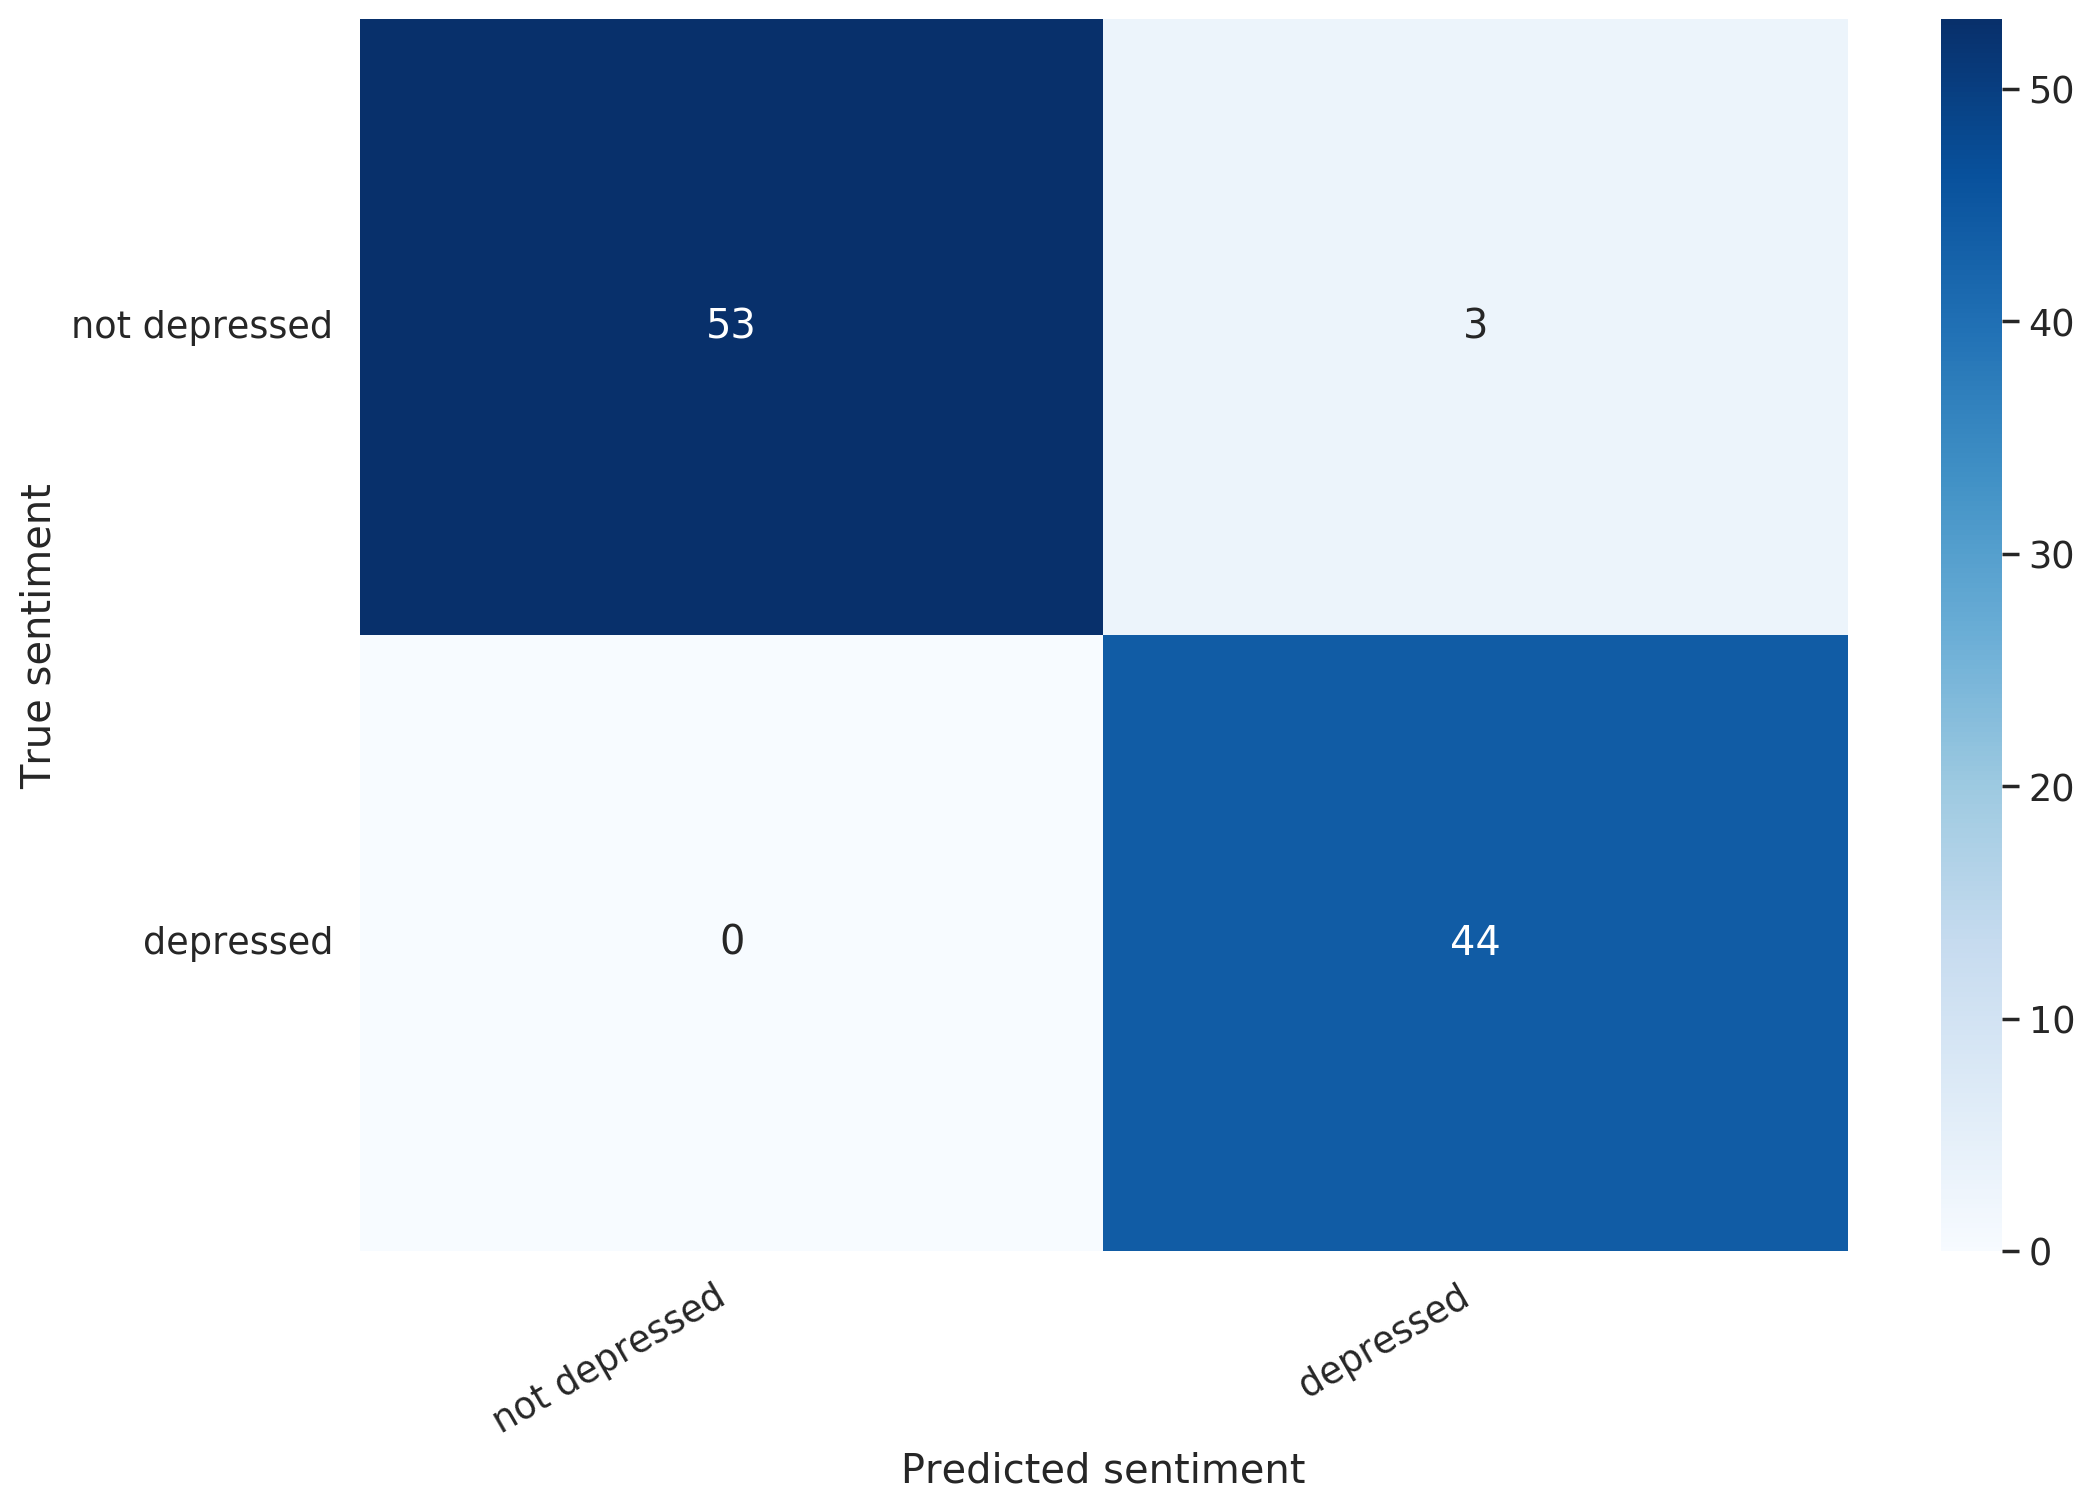

In [88]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

This confirms that our model is having difficulty classifying neutral reviews. It mistakes those for negative and positive at a roughly equal frequency.

That‚Äôs a good overview of the performance of our model.

## Predicting on raw text

In [89]:
review_text = "I love completing my todos! Best app ever!!!"

In [90]:
encoded_review = tokenizer.encode_plus(
    review_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

In [91]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : not depressed
